# <center> Text as data: A brief introduction </center>

## <center> ACE 592 </center>


## Text Data
Text data is our first example of __unstructured data__. 

For example, the first stanza of Dante's Divine Comedy:
<center> <img src="dante.png"> </center>

There are no rows, columns, or values. __So how do we do analysis?__


Text analysis is everywhere. Some current examples are:

- Predictive typing.
- Spam filtering.
- Sentiment analysis.
- Plagery detection.

Using inputs of text, they produce a prediction or analysis... but how?

## What is Text?
# <center> forest </center>

the word __"forest"__ is: 
1. a sequence of 6 characters separated by white space.
2. a sequence of characters that maps to a concept.

Computers __only see it the first way,__ whereas __our brains see it the second way__.

To analyze text, we need to reverse engineer our brains to teach a computer how to __create data from text__.


## How Python sees text

We can input text in a variable:

In [1]:
dante = '''In the midway of this our mortal life, 
I found me in a gloomy wood, astray'''

dante

'In the midway of this our mortal life, \nI found me in a gloomy wood, astray'

It sees:
   - alpha-numeric characters (a, b, c, 1, 2, 3 etc.)
   - punctuation (commas, apostraphes)
   - line breaks ("\n")

## Text mining/analysis

The process of taking this unstructured data and imposing structure is called __text mining__ or __text analysis__.

To get it in a structure we have to define both __observations__ (rows) and __features__ (columns) in the text.

Some terminology
- __Tokens__: components of a string (words, lines, sentences).
    - e.g. "the bird is the word" = \["the", "bird", "is", "the", "word"\]
- __Stemming__: the process of breaking words into root words.
    - e.g. eating, eats = eat
- __Stop words__: common parts of speech usually omitted in word counts or analysis.
    - e.g. "the", "a", "of", etc.


## So what about Dante?

Dante's poetry could be broken down into tokens to use as observations, which then could be used to generate features of the data.

<center> <img src="dante.png"> </center>


__What are the possible tokens?__


The possible tokens are:
- __Words__ (separate by whitespace)
- __Sentences__ (separate by periods)
- __Lines__ (separate by line breaks)
- __Stanzas__ (separate by multiple line breaks)

Potential features could be:
- __Number of times a word/phrase appears__ in each token.
- __The predicted sentiment__ of the token.



## Tokenizing Dante

In [3]:
dante = '''In the midway of this our mortal life,
I found me in a gloomy wood, astray
Gone from the path direct: and e'en to tell
It were no easy task, how savage wild
That forest, how robust and rough its growth,
Which to remember only, my dismay
Renews, in bitterness not far from death.
Yet to discourse of what there good befell,
All else will I relate discover'd there.
How first I enter'd it I scarce can say,
Such sleepy dullness in that instant weigh'd
My senses down, when the true path I left,
But when a mountain's foot I reach'd, where clos'd
The valley, that had pierc'd my heart with dread,
I look'd aloft, and saw his shoulders broad
Already vested with that planet's beam,
Who leads all wanderers safe through every way.
'''

In [4]:
sentences = dante.split(".")
sentences[0]

"In the midway of this our mortal life,\nI found me in a gloomy wood, astray\nGone from the path direct: and e'en to tell\nIt were no easy task, how savage wild\nThat forest, how robust and rough its growth,\nWhich to remember only, my dismay\nRenews, in bitterness not far from death"

In [5]:
lines = sentences[0].split("\n")
lines[:4]

['In the midway of this our mortal life,',
 'I found me in a gloomy wood, astray',
 "Gone from the path direct: and e'en to tell",
 'It were no easy task, how savage wild']

In [6]:
words = lines[2].split(" ")
words

['Gone', 'from', 'the', 'path', 'direct:', 'and', "e'en", 'to', 'tell']

## Counting words in Dante

First remove punctuation and then put everything in lowercase

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
# This maketrans function can be used to remove a list of characters from a string.
remv_punc = str.maketrans('','',string.punctuation)

# Call the translate function and make everything lower case
dante_nopunc = dante.translate(remv_punc).lower()

dante_nopunc[:50]

'in the midway of this our mortal life\ni found me i'

Now let's make __lines__ the unit of analysis and count the words in each line.

This code uses list comprehensions and the "value_counts" function in pandas:

In [9]:
import pandas as pd

# Split on whitespace and on new lines
  #             List of words         go over each line except last one
lines_words = [x.split(" ") for x in dante_nopunc.split("\n")[:-1]]

In [10]:
# Convert each to pandas Series object
#         Make each list a series     for each list of words  
lines_series = [pd.Series(x) for x in lines_words]

In [11]:
# Call function "value_counts" to count the number of words.
#            count number of words       for each series             
lines_wcs = [x.value_counts() for x in lines_series]

In [12]:
# Concatenate them all together, fill missing values with zero, and transpose
df = pd.concat(lines_wcs,axis=1).fillna(0).T

We now  have a dataframe that has lines as rows and word counts as columns!

In [13]:
print(df.shape)

(17, 102)


In [14]:
df.head()

,in,the,midway,of,this,our,mortal,life,i,found,...,vested,planets,beam,who,leads,wanderers,safe,through,every,way
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <center> What do you think the five most common words will be in this data set? </center>

### Answer:

In [14]:
df.sum().sort_values(ascending=False).head(7)

i       7.0
in      4.0
that    4.0
the     4.0
how     3.0
my      3.0
to      3.0
dtype: float64

Unsuprisingly, it is common words like "I" and "the". This is why we omit __stop words__ when analyzing text.

### Using Stop Words
In the nltk package we can extract a common list of stop words.

In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

We can take out the stop words with one single line:

In [16]:
#                  All rows (:), but omit (~) columns that are in (.isin()) this list (stop_words)
df_no_sws = df.loc[:,~df.columns.isin(stop_words)]
df_no_sws.head()

,midway,mortal,life,found,gloomy,wood,astray,gone,path,direct,...,broad,already,vested,planets,beam,leads,wanderers,safe,every,way
count,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__What did this code do?__

#### What that one line did, step by step:
              df.loc[:,~df.columns.isin(dem_words)]
  
  1. First it called the list of columns and assessed a Boolean condition: are any of the column labels in the list "dem_words"? `df.columns.isin(dem_words)`
  2. Then it took the negative of that condition using the character "\~"; now it assesses whether a character __isn't__ in the list:`~df.columns.isin(dem_words)`
  3. Then, using the object `df`, it only selects the columns where the condition holds ("True"), meaning those column labels that are not in the list "dem_words": `df.loc[:,~df.columns.isin(dem_words)]`
          

New top word counts:

In [17]:
df_no_sws.sum().sort_values(ascending=False).head(5)

path      2.0
true      1.0
valley    1.0
closd     1.0
reachd    1.0
dtype: float64

In so few lines, very few non-stop words appear more than once.

## Feature Generation
The process of making columns from unstructured data is called __feature extraction__.

Some examples of __feature extraction__ in text analysis:
- counting words
    - Bag of words, word clouds.
- counting phrases
    - N-grams.
- analyzing "sentiment"
    - Using machine learning to predict sentiment from text that we already know (or think we know) the sentiment of. 

## What's the issue with just counting words?

<center>"Military industrial complex" vs "Industrial organization theory"</center>

The word "industrial" is in both strings, but does it mean the same thing?

## What are N-grams?
The problem with just counting words is that __context matters__. N-grams is a way to try and get at that issue.

Essentially, N-grams tokenize strings into lists that are length N

In [18]:
from nltk import ngrams

string =  "In the midway of this our mortal life"

# 2-gram
print([x for x in ngrams(string.split(),2)])
# 3-gram
print([x for x in ngrams(string.split(),3)])

[('In', 'the'), ('the', 'midway'), ('midway', 'of'), ('of', 'this'), ('this', 'our'), ('our', 'mortal'), ('mortal', 'life')]
[('In', 'the', 'midway'), ('the', 'midway', 'of'), ('midway', 'of', 'this'), ('of', 'this', 'our'), ('this', 'our', 'mortal'), ('our', 'mortal', 'life')]


In [19]:
lines = dante_nopunc.split("\n")

grams2 = [[y for y in ngrams(line.split(),2)] for line in lines]

# Convert each to pandas Series object
lines_series = [pd.Series(x) for x in grams2]

# Call function "value_counts" to count the number of words.
lines_wcs = [x.value_counts() for x in lines_series]

# Concatenate them all together, fill missing values with zero, and transpose
df = pd.concat(lines_wcs,axis=1).fillna(0).T

df.sum().sort_values()

(in, the)           1.0
(a, mountains)      1.0
(when, a)           1.0
(but, when)         1.0
(i, left)           1.0
                   ... 
(robust, and)       1.0
(how, robust)       1.0
(forest, how)       1.0
(in, bitterness)    1.0
(every, way)        1.0
Length: 117, dtype: float64

Here nothing appeared more than once, so this was not very useful.

__In what cases would this be useful?__

### Some potential uses of N-grams
- Finding a phrase that appears throughout the text.
    - Using something like the code above.
- Counting the incidences of a certain phrase or sequence of words.
- Discover previously unknown combination of words.

## Stemming and Lemmatisation
Some words are technically different, but have the same "root word":
- eat, eating, eats
- democratic, democracy, democratize.

In our bag of words approach, these will all count as different words. But what if we want to take into account their relationship?

__Lemmatization__ finds the root, dictionary word. It is based on the meaning of the word.

__Stemming__ simply finds the stub of the word. It is based on the lettering of the word

In [20]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

eat = ['eats','eating','eat','ate']
democracy = ['democracies','democracy','democratic','democrat']

[stemmer.stem(x) for x in eat],\
[stemmer.stem(x) for x in democracy],

(['eat', 'eat', 'eat', 'ate'],
 ['democraci', 'democraci', 'democrat', 'democrat'])

In [21]:
# pos = part of speech, in this case "v" for "verb" and  "n" for "noun"
[lemmatizer.lemmatize(x,pos='v') for x in eat], \
[lemmatizer.lemmatize(x,pos="n") for x in democracy]

(['eat', 'eat', 'eat', 'eat'],
 ['democracy', 'democracy', 'democratic', 'democrat'])

__Why is the output different for these two algorithms?__

The __lemmatization__ algorithm found the word "eat" as the root of all the eat list, but could not relate "democratic" and "democrat" because they differ in their meaning.

The __stemming__ algorithm could pull out a root "democrat," but could not relate "ate" to the rest of the words.

__When are each of these useful?__

## Types of Analysis
Two common ones are:
- Visualizations of word counts.
- Sentiment analysis.

Here are two examples, using data that we will return to in this module:

## Example 1:  Counting Words
### Word Cloud of "Les Misérables" by Victor Hugo

### <center> The Preface: <center/>
<center>
<img src="les-miserables.png" with="1200">
Using the text of the book, we can create a visualization by counting the number of times a word appears.
</center>
    

<img src="Les_Mis_wc1.png">

## Example 2: Sentiment Analysis
### The Hedonometer

A project called ["The Hedonometer"](https://hedonometer.org/) uses a mapping of words to "happiness scores" to determine whether Tweets are happy or sad.

<center>
<img src="hedonometer_words.png" width="600">
</center>

In [24]:
import requests
import pandas as pd
import json
url = 'http://hedonometer.org/api/v1/happiness/?format=json&timeseries__title=en_all&date__gte=2022-01-01&limit=1000'
r = requests.get(url)
r.status_code
df = pd.DataFrame(json.loads(r.content)['objects'])
df.sort_values('date')

,date,frequency,happiness,timeseries
0,2022-01-01,153357743.0,6.150,/api/v1/timeseries/3/
1,2022-01-02,161880469.0,6.053,/api/v1/timeseries/3/
2,2022-01-03,169773375.0,6.034,/api/v1/timeseries/3/
3,2022-01-04,172208177.0,6.014,/api/v1/timeseries/3/
4,2022-01-05,181196294.0,5.987,/api/v1/timeseries/3/
...,...,...,...,...
506,2023-05-22,171660415.0,6.030,/api/v1/timeseries/3/
507,2023-05-23,166443756.0,6.033,/api/v1/timeseries/3/
508,2023-05-24,183687637.0,6.025,/api/v1/timeseries/3/
509,2023-05-25,170265817.0,6.014,/api/v1/timeseries/3/


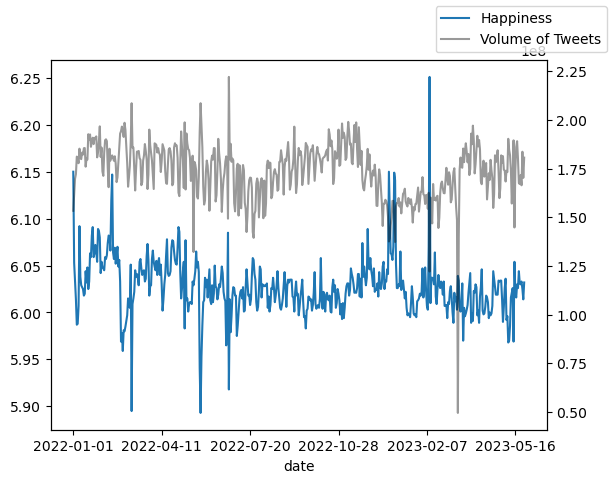

In [25]:
import matplotlib.pyplot as plt
f,a = plt.subplots()
df.set_index("date").happiness.astype(float).plot(ax=a,label="Happiness")
a2 = a.twinx()
df.set_index("date").frequency.astype(float).plot(ax=a2,color="black",alpha=.4,label="Volume of Tweets")
f.legend()

### The challenges of text analysis

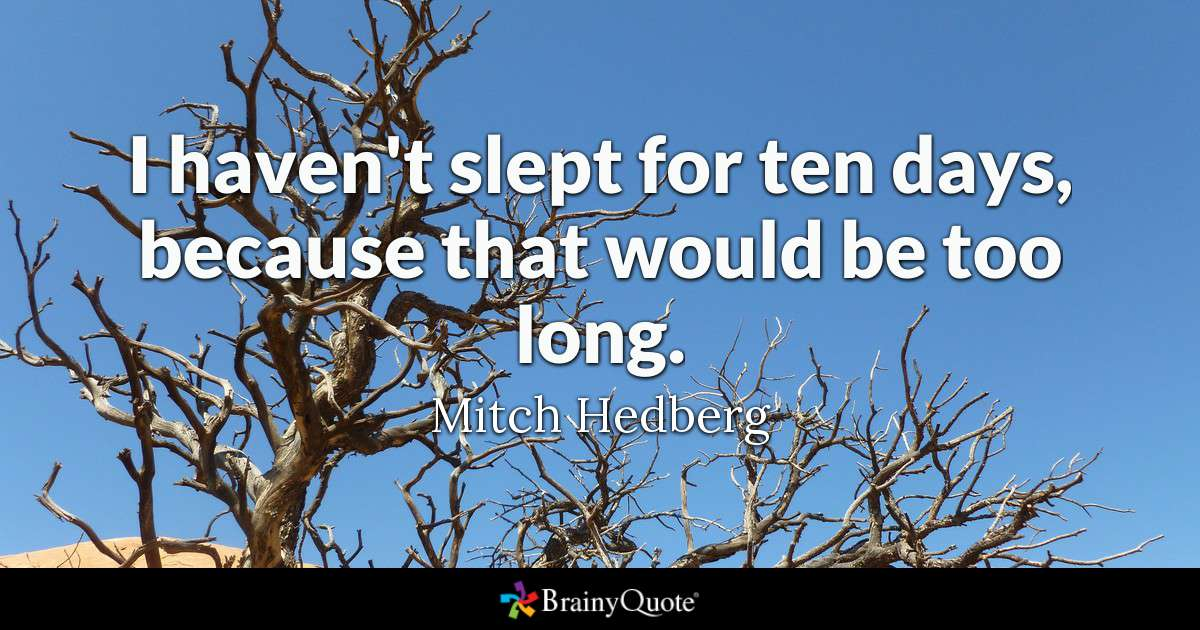